In [1]:
# Install necessary package (if not already)
# !pip install ipywidgets tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import ipywidgets as widgets
from IPython.display import display

# Upload CSV file
uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

def handle_upload(change):
    if uploader.value:
        # Load dataset
        uploaded_file = next(iter(uploader.value.values()))
        df = pd.read_csv(pd.io.common.BytesIO(uploaded_file['content']))

        # Assume daily data and use rainfall
        df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
        data = df[['rainfall']].values

        # Normalize data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data)

        # Prepare sequences for LSTM
        def create_sequences(data, time_steps=10):
            X, y = [], []
            for i in range(len(data) - time_steps):
                X.append(data[i:i+time_steps])
                y.append(data[i+time_steps])
            return np.array(X), np.array(y)

        time_steps = 10
        X, y = create_sequences(scaled_data, time_steps)

        # Build LSTM model
        model = Sequential([
            LSTM(50, activation='relu', input_shape=(time_steps, 1)),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=20, batch_size=16, verbose=1)

        # Forecast next 30 days
        last_seq = scaled_data[-time_steps:]
        forecast = []
        input_seq = last_seq.reshape(1, time_steps, 1)
        for _ in range(30):
            next_val = model.predict(input_seq, verbose=0)
            forecast.append(next_val[0][0])
            input_seq = np.append(input_seq[:, 1:, :], [[next_val]], axis=1)

        forecast_values = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

        # Plot results
        plt.figure(figsize=(10, 4))
        plt.plot(df.index[-60:], df['rainfall'][-60:], label='Past Rainfall')
        future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
        plt.plot(future_dates, forecast_values, color='red', label='Forecasted Rainfall')
        plt.title("Neural Network Forecast - Rainfall (Next 30 Days)")
        plt.xlabel("Date")
        plt.ylabel("Rainfall (mm)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

uploader.observe(handle_upload, names='value')


FileUpload(value={}, accept='.csv', description='Upload')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0371
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078
Epoch 12/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080
Epoch 13/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081
Epoch 14/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078
Epoch 15/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [2]:
        forecast = []
        input_seq = last_seq.reshape(1, time_steps, 1)
        for _ in range(30):
            next_val = model.predict(input_seq, verbose=0)
            forecast.append(next_val[0][0])

            # Append predicted value and remove first timestep
            next_input = np.append(input_seq[0, 1:], [[next_val[0][0]]], axis=0)
            input_seq = next_input.reshape(1, time_steps, 1)


NameError: name 'last_seq' is not defined

FileUpload(value={}, accept='.csv', description='Upload')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0581
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077
Epoch 12/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081
Epoch 13/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087
Epoch 14/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081
Epoch 15/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078


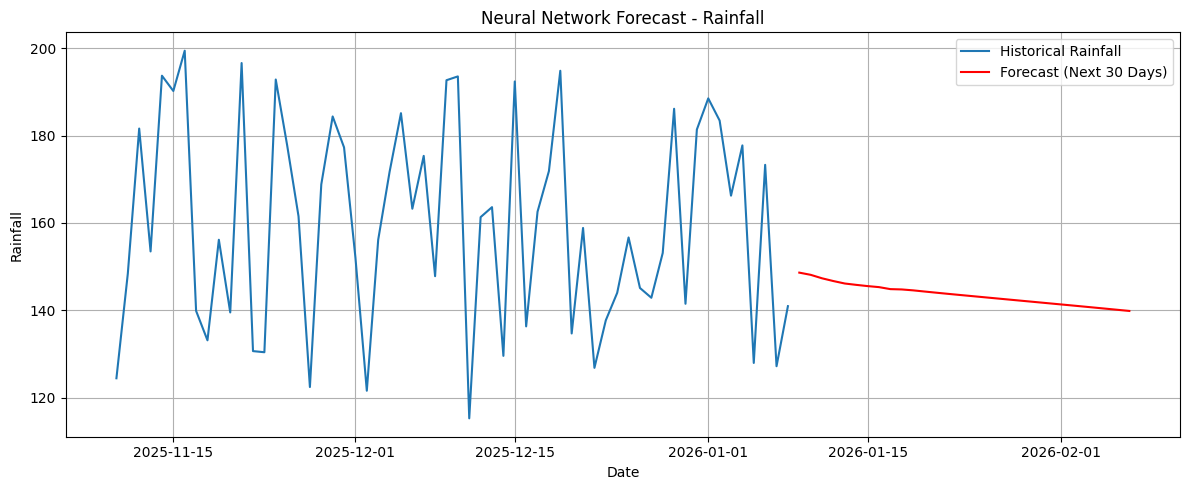

In [3]:
# Install required packages (uncomment if needed)
# !pip install ipywidgets tensorflow --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import ipywidgets as widgets
from IPython.display import display

# File uploader widget
uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

def handle_upload(change):
    if uploader.value:
        # Read uploaded file
        uploaded_file = next(iter(uploader.value.values()))
        df = pd.read_csv(pd.io.common.BytesIO(uploaded_file['content']))

        # Use 'rainfall' column as time series target
        rainfall_data = df[['rainfall']].values

        # Normalize the data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(rainfall_data)

        # Create sequences
        time_steps = 10
        X, y = create_sequences(scaled_data, time_steps)

        # Reshape for LSTM input
        X = X.reshape(X.shape[0], X.shape[1], 1)

        # Build LSTM model
        model = Sequential([
            LSTM(64, activation='relu', input_shape=(X.shape[1], 1)),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=20, batch_size=16, verbose=1)

        # Forecast next 30 days
        last_seq = scaled_data[-time_steps:]
        forecast = []
        input_seq = last_seq.reshape(1, time_steps, 1)

        for _ in range(30):
            next_val = model.predict(input_seq, verbose=0)
            forecast.append(next_val[0][0])
            # Update input sequence
            input_seq = np.append(input_seq[:, 1:, :], [[[next_val[0][0]]]], axis=1)

        # Inverse scale forecast values
        forecast_values = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

        # Create future dates
        df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
        future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

        # Plot results
        plt.figure(figsize=(12, 5))
        plt.plot(df.index[-60:], df['rainfall'][-60:], label='Historical Rainfall')
        plt.plot(future_dates, forecast_values, color='red', label='Forecast (Next 30 Days)')
        plt.title("Neural Network Forecast - Rainfall")
        plt.xlabel("Date")
        plt.ylabel("Rainfall")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Trigger the upload handler
uploader.observe(handle_upload, names='value')
